# GENRE CLASSIFICATION
## [SPOTIFY TRACKS DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)


In [1]:
import pandas as pd


#Data Characteristics
spotify_data = pd.read_csv("SpotifyFeatures.csv")
display(spotify_data.head())
display(spotify_data.info())
display(spotify_data.describe())
print("\nUnique genres: ", pd.unique(spotify_data['genre']))


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


None

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000



Unique genres:  ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


## Encoding:
artist_name: remove 
track_name: remove  
track_id: remove  
key: 1 hot encode it  
mode: Binary Encode: Major = 1, Minor = 0  
time_signature: Will convert to linear scale  
genres: Will one hot encode genres  
Condense duplicates and one hot encode songs to show multiple genres  


In [2]:
def one_hot_encode(df, column_name):
    """
    Function to one hot encode a column and remove the old column from data frame
    :param df: pandas data frame that needs encoding
    :param column_name: name of column
    :returns: pandas data frame with one hot encoded columns
    """
    df_one_hot = df.copy()
    df_one_hot = pd.concat([df_one_hot,pd.get_dummies(df_one_hot[column_name], prefix=column_name)],axis=1)
    df_one_hot.drop([column_name],axis=1, inplace=True)
    return df_one_hot



In [3]:
#Factorized Data
#Factorize columns that are strings
def factorized_column(df, column_name):
    """
    Function to factorize a column in a pandas dataframe
    :param df: pandas data frame that needs encoding
    :param column_name: name of column
    :returns: pandas data frame with factorized column and mapping of encoding
    """
    df_factorized = df.copy()
    df_factorized[column_name], mapping = pd.factorize(df[column_name])
    return df_factorized, mapping



In [4]:
#Checking for incomplete data
print("Amount of Null in Data: ", spotify_data.isnull().sum().sum())
print("Amount of N/A in Data: ", spotify_data.isna().sum().sum())
print("No incomplete data")

#Encoding Data as per Encoding Section
spotify_data_encoded = spotify_data.copy()
spotify_data_encoded = one_hot_encode(spotify_data_encoded,'key')
spotify_data_encoded = one_hot_encode(spotify_data_encoded,'genre')

mode_dictionary = {'Major' : 1, 'Minor' : 0}
spotify_data_encoded['mode'].replace(mode_dictionary, inplace=True)
time_dictionary = {'0/4' : 0, '1/4' : 1, '3/4': 1, '4/4': 4,'5/4': 5}
spotify_data_encoded['time_signature'].replace(time_dictionary, inplace=True)
print("Encoded key, genre, mode, time_signature")

genre_column_list = []
for genre in pd.unique(spotify_data['genre']):
    genre_column_list.append("genre_"+genre)

#Deleting Duplicates in data with exact values in track_id
#Spotify will categorize 1 unique song into multiple genres
#We will take the first genre that the song is categorized into
spotify_data_encoded = spotify_data_encoded.drop_duplicates(subset='track_id', keep='first')

#Consolodating duplicate tracks to 1 row with one hot encoding of genres
#Will take some time
print("Starting to make track dictionary")
trackid_to_genre_dict = {}
for index, row in spotify_data.iterrows():
    track_id = row['track_id']
    genre = row['genre']
    if track_id in trackid_to_genre_dict:
        trackid_to_genre_dict[track_id].append(genre)
    else:
        trackid_to_genre_dict[track_id] = [genre]
#display(trackid_to_genre_dict)
print("Done making track dictionary")

print("Starting to condense tracks to encoded dataframe")

for index, row in spotify_data_encoded.iterrows():    
    track_id = row['track_id']
    genre_list = trackid_to_genre_dict[track_id]
    for genre in genre_list:
        genre_label = "genre_"+ genre
        spotify_data_encoded.at[index,genre_label] = 1

print("Done condensing tracks to encoded dataframe")

print("Total Songs that were removed due to duplication: ", (spotify_data.shape[0] - spotify_data_encoded.shape[0]))
spotify_data_encoded.drop(['track_name'],axis=1, inplace=True)
spotify_data_encoded.drop(['track_id'],axis=1, inplace=True)
spotify_data_encoded.drop(['artist_name'],axis=1, inplace=True)



"""
#Failed attempts
#Takes way too long

unique_track_list = spotify_data_encoded['track_id']
for track in unique_track_list:
    query_df = spotify_data_encoded.query('track_id == "'+ str(track) + '"')
    for genre in genre_column_list:
        has_true = (query_df[genre] == 1).tolist()
        if True in has_true:
            for index in query_df.index.values.tolist():
                spotify_data_encoded.at[index,genre]=1

Another attempt to get rows done
for index, row in spotify_data.iterrows():
    if(index%1000 == 0):
        print(index)
    track_id = row['track_id']
    index_track = spotify_data_non_duplicates.index[spotify_data_non_duplicates['track_id'] == track_id].tolist()[0]
    genre = row['genre']
    genre_label = "genre_"+ genre
    spotify_data_non_duplicates.at[index_track,genre_label] = 1
"""
print("\nspotify_data_encoded is clean data")
print("\nspotify_data is original data")


Amount of Null in Data:  0
Amount of N/A in Data:  0
No incomplete data
Encoded key, genre, mode, time_signature
Starting to make track dictionary
Done making track dictionary
Starting to condense tracks to encoded dataframe
Done condensing tracks to encoded dataframe
Total Songs that were removed due to duplication:  55951

spotify_data_encoded is clean data

spotify_data is original data


In [5]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

spotify_features = spotify_data_encoded.drop(genre_column_list,axis=1)
spotify_target = spotify_data_encoded[genre_column_list]

scaler.fit(spotify_features)
spotify_feature_scaler = scaler.transform(spotify_features)
spotify_feature_scaler = pd.DataFrame(spotify_feature_scaler, index=spotify_features.index, columns=spotify_features.columns)

display(spotify_feature_scaler.head())
display(spotify_target.head())


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,-2.085747,0.564740,-0.798733,-1.047822,1.279646,-0.532841,0.575611,1.299283,0.718210,-0.366515,...,-0.280487,-0.366868,3.080147,-0.34336,-0.186793,-0.286485,-0.311165,-0.262123,-0.361948,-0.259774
1,-2.028246,-0.431708,0.257016,-0.756663,0.652467,-0.532841,-0.348444,0.715907,-1.392351,-0.198661,...,-0.280487,-0.366868,-0.324660,-0.34336,-0.186793,-0.286485,-0.311165,3.815003,-0.361948,-0.259774
2,-1.913244,1.495668,0.640447,-0.504626,-1.544471,-0.532841,-0.575904,-0.585001,-1.392351,-0.446282,...,-0.280487,2.725776,-0.324660,-0.34336,-0.186793,-0.286485,-0.311165,-0.262123,-0.361948,-0.259774
3,-2.085747,0.815900,-1.581352,-0.641318,-0.837536,-0.532841,-0.597228,-0.319034,0.718210,-0.430133,...,-0.280487,-0.366868,3.080147,-0.34336,-0.186793,-0.286485,-0.311165,-0.262123,-0.361948,-0.259774
4,-1.855743,1.490208,-1.103376,-1.176146,-1.203692,-0.151959,-0.106768,-1.721889,0.718210,-0.400281,...,-0.280487,-0.366868,-0.324660,-0.34336,-0.186793,-0.286485,3.213726,-0.262123,-0.361948,-0.259774


,genre_Movie,genre_R&B,genre_A Capella,genre_Alternative,genre_Country,genre_Dance,genre_Electronic,genre_Anime,genre_Folk,genre_Blues,...,genre_Pop,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Adi's PCA Visuals

In [52]:
from sklearn.decomposition import PCA
#create the instance of the model 
pca = PCA(n_components = 2)
#display(spotify_target)
#display(spotify_feature_scaler)
principalComponents = pca.fit_transform(spotify_feature_scaler)
#display(spotify_feature_scaler)
#modified feature set to redeuce dimensions to 2
tempDF = pd.DataFrame(data = principalComponents, columns = ['PCA Feature 1','PCA Feature 2'])
#display(tempDF)
#create a new DF with PCA transformation
PCADF = pd.concat([tempDF.reset_index(), spotify_target.reset_index()], axis = 1)
PCADF = PCADF.drop(['index'], axis=1)
display(PCADF)


,PCA Feature 1,PCA Feature 2,genre_Movie,genre_R&B,genre_A Capella,genre_Alternative,genre_Country,genre_Dance,genre_Electronic,genre_Anime,...,genre_Pop,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World
0,-1.319504,1.055468,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.611343,0.447343,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.513094,-0.264834,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.454893,-0.072364,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.573445,0.123745,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,-1.749486,0.119402,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
176770,-1.375345,-0.505434,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
176771,0.861527,0.228424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
176772,-2.141694,-0.203062,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [129]:
#Create a new Dataframe for PCA visuals
PCAVisual = pd.DataFrame()
genreList = genre_column_list
for genre in genreList:
    print("Parsing through genre: " + str(genre))
   # PCAVisual=PCAVisual.reset_index()
    tempDF = PCADF.loc[PCADF[genre] == 1] #go through each genre and grab the ones with value 1
    tempDF2 = tempDF[['PCA Feature 1', 'PCA Feature 2', genre]] #will need to change for 3D PCA
    tempDF2.rename(columns={genre: 'Genre'}, inplace=True)
    tempDF2['Genre'].replace({1: genre}, inplace=True)
    PCAVisual= PCAVisual.append(tempDF2)
    #display(PCAVisual)
PCAVisual = PCAVisual.reset_index()
PCAVisual = PCAVisual.drop(['index'], axis =1)
display(PCAVisual)

Parsing through genre: genre_Movie
Parsing through genre: genre_R&B
Parsing through genre: genre_A Capella
Parsing through genre: genre_Alternative
Parsing through genre: genre_Country
Parsing through genre: genre_Dance
Parsing through genre: genre_Electronic
Parsing through genre: genre_Anime
Parsing through genre: genre_Folk
Parsing through genre: genre_Blues
Parsing through genre: genre_Opera
Parsing through genre: genre_Hip-Hop
Parsing through genre: genre_Children's Music
Parsing through genre: genre_Children’s Music
Parsing through genre: genre_Rap
Parsing through genre: genre_Indie
Parsing through genre: genre_Classical
Parsing through genre: genre_Pop
Parsing through genre: genre_Reggae
Parsing through genre: genre_Reggaeton
Parsing through genre: genre_Jazz
Parsing through genre: genre_Rock
Parsing through genre: genre_Ska
Parsing through genre: genre_Comedy
Parsing through genre: genre_Soul
Parsing through genre: genre_Soundtrack
Parsing through genre: genre_World


,PCA Feature 1,PCA Feature 2,Genre
0,-1.319504,1.055468,genre_Movie
1,-1.611343,0.447343,genre_Movie
2,1.513094,-0.264834,genre_Movie
3,1.454893,-0.072364,genre_Movie
4,2.573445,0.123745,genre_Movie
...,...,...,...
232720,-1.633147,-0.046740,genre_World
232721,4.570123,-0.750520,genre_World
232722,-1.234241,-0.286630,genre_World
232723,3.202706,0.299872,genre_World


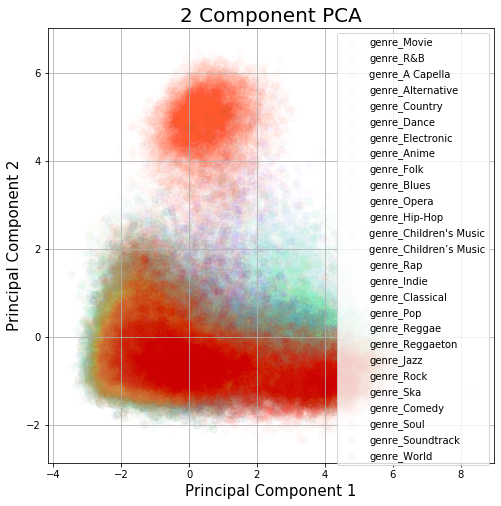

In [145]:
#Start PCA Visualizations\

#for color purposes
from matplotlib.pyplot import cm
import numpy as np
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
color=iter(cm.rainbow(np.linspace(0,1,27)))
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
for target in genre_column_list:
    indicesToKeep = PCAVisual['Genre'] == target
    ax.scatter(PCAVisual.loc[indicesToKeep, 'PCA Feature 1']
               , PCAVisual.loc[indicesToKeep, 'PCA Feature 2']
               , c= next(color)
               , s = 50
               , alpha=0.02)
ax.legend(genre_column_list)
ax.grid()



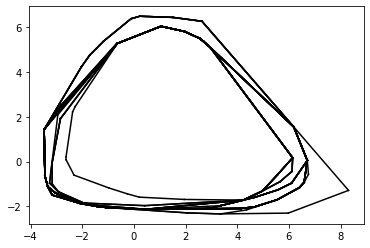

In [175]:
from scipy.spatial import ConvexHull
import numpy as np
g = np.random.rand(30, 2)
points = []
name = 'genre_Movie'

for name in genre_column_list:
    tempDF = PCAVisual.loc[PCAVisual['Genre'] == name]
    for index, row in tempDF.iterrows():
        tempTuple = []
        tempTuple.append(row['PCA Feature 1'])
        tempTuple.append(row['PCA Feature 2'])
        points.append(tempTuple)
    pointsArray = np.array(points)
    hull = ConvexHull(pointsArray)
   # plt.plot(pointsArray[:,0], pointsArray[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(pointsArray[simplex, 0], pointsArray[simplex, 1], 'k-')

PCA with 3 components

In [176]:
#create the instance of the model 
pca = PCA(n_components = 3)
#display(spotify_target)
#display(spotify_feature_scaler)
principalComponents = pca.fit_transform(spotify_feature_scaler)
#display(spotify_feature_scaler)
#modified feature set to redeuce dimensions to 2
tempDF = pd.DataFrame(data = principalComponents, columns = ['PCA Feature 1','PCA Feature 2', 'PCA Feature 3'])
#display(tempDF)
#create a new DF with PCA transformation
PCADF = pd.concat([tempDF.reset_index(), spotify_target.reset_index()], axis = 1)
PCADF = PCADF.drop(['index'], axis=1)
display(PCADF)

,PCA Feature 1,PCA Feature 2,PCA Feature 3,genre_Movie,genre_R&B,genre_A Capella,genre_Alternative,genre_Country,genre_Dance,genre_Electronic,...,genre_Pop,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World
0,-1.319586,1.062046,-1.141272,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.617343,0.518743,0.803229,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.514397,-0.261569,-0.743235,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.454242,-0.062943,-0.879153,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.581672,0.029477,-0.301796,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,-1.750018,0.159672,1.581228,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
176770,-1.374633,-0.530505,-1.383679,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
176771,0.861354,0.249708,1.625876,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
176772,-2.143078,-0.180656,1.617942,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [179]:
#Create a new Dataframe for PCA visuals
PCAVisual2 = pd.DataFrame() #changed name for the df to avoid any possible copy warnings
genreList = genre_column_list
for genre in genreList:
    print("Parsing through genre: " + str(genre))
   # PCAVisual=PCAVisual.reset_index()
    tempDF = PCADF.loc[PCADF[genre] == 1] #go through each genre and grab the ones with value 1
    tempDF2 = tempDF[['PCA Feature 1', 'PCA Feature 2','PCA Feature 3', genre]] #changed for 3 component PCA
    tempDF2.rename(columns={genre: 'Genre'}, inplace=True)
    tempDF2['Genre'].replace({1: genre}, inplace=True)
    PCAVisual2= PCAVisual2.append(tempDF2)
PCAVisual2 = PCAVisual2.reset_index()
PCAVisual2 = PCAVisual2.drop(['index'], axis =1)
display(PCAVisual2)

Parsing through genre: genre_Movie
Parsing through genre: genre_R&B
Parsing through genre: genre_A Capella
Parsing through genre: genre_Alternative
Parsing through genre: genre_Country
Parsing through genre: genre_Dance
Parsing through genre: genre_Electronic
Parsing through genre: genre_Anime
Parsing through genre: genre_Folk
Parsing through genre: genre_Blues
Parsing through genre: genre_Opera
Parsing through genre: genre_Hip-Hop
Parsing through genre: genre_Children's Music
Parsing through genre: genre_Children’s Music
Parsing through genre: genre_Rap
Parsing through genre: genre_Indie
Parsing through genre: genre_Classical
Parsing through genre: genre_Pop
Parsing through genre: genre_Reggae
Parsing through genre: genre_Reggaeton
Parsing through genre: genre_Jazz
Parsing through genre: genre_Rock
Parsing through genre: genre_Ska
Parsing through genre: genre_Comedy
Parsing through genre: genre_Soul
Parsing through genre: genre_Soundtrack
Parsing through genre: genre_World


,PCA Feature 1,PCA Feature 2,PCA Feature 3,Genre
0,-1.319586,1.062046,-1.141272,genre_Movie
1,-1.617343,0.518743,0.803229,genre_Movie
2,1.514397,-0.261569,-0.743235,genre_Movie
3,1.454242,-0.062943,-0.879153,genre_Movie
4,2.581672,0.029477,-0.301796,genre_Movie
...,...,...,...,...
232720,-1.635303,-0.028853,-1.093265,genre_World
232721,4.567627,-0.680481,0.999851,genre_World
232722,-1.236200,-0.253255,0.605579,genre_World
232723,3.197611,0.314044,0.348126,genre_World


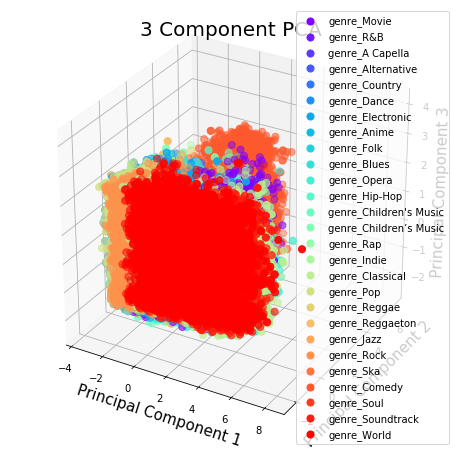

In [188]:
#Start PCA Visualizations\
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
#for color purposes
matplotlib_axes_logger.setLevel('ERROR')
color=iter(cm.rainbow(np.linspace(0,1,27)))
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection="3d")
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

#ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)
for target in genre_column_list:
    indicesToKeep = PCAVisual2['Genre'] == target
    ax.scatter3D(PCAVisual2.loc[indicesToKeep, 'PCA Feature 1']
               , PCAVisual2.loc[indicesToKeep, 'PCA Feature 2']
               , PCAVisual2.loc[indicesToKeep, 'PCA Feature 3']
               , c= next(color)
               , s = 50)
ax.legend(genre_column_list)
ax.grid()

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt
#Find Correlations within data and plotting them on heat map
corr_matric = spotify_data.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corr_matric, annot=True, cmap="coolwarm")
plt.show()

<Figure size 1500x1500 with 2 Axes>

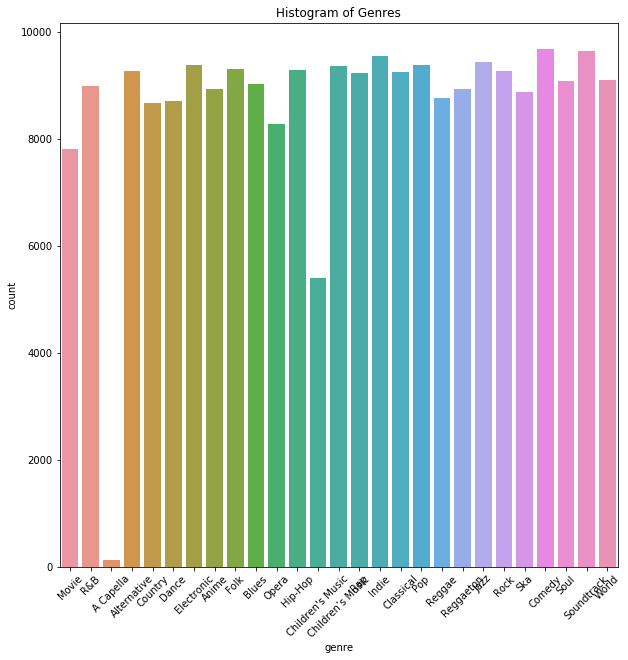

In [7]:
#Bar Chart to show distribution of Genres
plt.subplots(figsize=(10,10))
sn.countplot(spotify_data['genre'])
plt.title('Histogram of Genres')
plt.xticks(rotation=45)
plt.show()



In [8]:
#Test KNN on Data
#Starting Point for KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



k_neighbors = 3
neigh = KNeighborsClassifier(n_neighbors=k_neighbors)
X_train, X_test, y_train, y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))






KeyboardInterrupt: 

## TODO:

Adi:
PCA Visuals in 2 or 3 dimensions  
Main thing: all of one genre in one color  
KNN:  
new Accuracy metric, top 1 or 2 correct  
Grid search for hyper parameter training


Keeshan:
basic decision tree stuff:    
multi class accuracy  
       convert to true or false  
       take all trues  
           keep them   
           40% of the total dataset  
           60% falses should be equally distributed in the 26 genres (not number but % distributed)  

# Keeshan Work Below for Feature Selection

In [ ]:
#Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(spotify_feature_scaler, spotify_target)
# display the relative importance of each attribute
model.feature_importances_



In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
display(feats)

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [ ]:
#Feature Selection
X_train, X_test, y_train, y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
neigh.fit(X_train, y_train)

model = RandomForestClassifier()
model.fit(spotify_feature_scaler, spotify_target)
# display the relative importance of each attribute


In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
display(feats)

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
plt.show()

#print(model.score(spotify_feature_scaler,spotify_target))